In [1]:
import pandas as pd
data = pd.read_csv('India Agriculture Crop Production.csv')
data.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


# Data Cleaning
### Missing Values

In [2]:
# missing values - function
def missing_values(data, n):
    total_missing = data.isnull().sum().sort_values(ascending=False)
    percent_missing = (data.isnull().sum() / data.isnull().count())*100
    missing_data = pd.concat([total_missing, percent_missing], axis=1,
                            keys=['Total', 'Percent'])
    return missing_data.head(n)

In [3]:
# missing data
missing_values(data, 10)

,Total,Percent
Production,10741,1.587907
Crop,967,0.142957
Area,967,0.142957
Area Units,967,0.142957
Production Units,967,0.142957
Yield,967,0.142957
State,0,0.000000
District,0,0.000000
Year,0,0.000000
Season,0,0.000000


In [4]:
data.shape

(676425, 10)

In [5]:
data['Area Units'].unique()

array(['Hectare', nan], dtype=object)

In [6]:
data['Production Units'].unique()

array(['Tonnes', 'Nuts', 'Bales', nan], dtype=object)

In [7]:
# remove all the rows that contain a missing value
data_droped = data.dropna()
data_droped.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [8]:
data_droped.shape

(665684, 10)

Only **1.5879070111246705 %** of data is Missing

In [9]:
100 - (665684/676425)*100

1.5879070111246705

Droping add missing Values from data

In [10]:
missing_values(data_droped, 10)

,Total,Percent
State,0,0.0
District,0,0.0
Crop,0,0.0
Year,0,0.0
Season,0,0.0
Area,0,0.0
Area Units,0,0.0
Production,0,0.0
Production Units,0,0.0
Yield,0,0.0


In [11]:
data = data_droped

Checking there is any different types of units presents.

If present convert into single unit

In [12]:
data['Area Units'].unique()

array(['Hectare'], dtype=object)

**Area Units** have only one type unit, So maybe we can remove this column from data

In [13]:
data['Production Units'].unique()

array(['Tonnes', 'Nuts', 'Bales'], dtype=object)

But **Production Units** have 3 types of Units

So find the index and convert them all into single unit (tonnes)

In [4]:
idx = data[data['Production Units'] == 'Nuts'].index.values
idx

array([    20,     21,     22, ..., 663790, 663791, 663792])

In [15]:
len(idx)

5782

In [5]:
idy = data[data['Production Units'] == 'Bales'].index.values
idy

array([   539,    540,    541, ..., 664492, 664493, 664494])

In [17]:
len(idy)

20742

In [18]:
idz = data[data['Production Units'] == 'Tonnes'].index.values
idz

array([     0,      1,      2, ..., 675505, 675506, 675507])

In [19]:
len(idz)

639160

**Production Units**

**Bales** into **Tonnes**

1 Bales = 217.7243376 Kg

1 Tonne = 1000 Kg

1 Bales = 0.2177243376 Tonne

In [25]:
# Conversion Bales into Tonnes
for i in idy:
    data['Production'][i] = data['Production'][i] / (0.2177243376)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Production Units**

**NUTS** into **Tonnes**

1 NUTS = 0.45 Kg

1 Tonne = 1000 Kg

1 NUTS =  0.00045 Tonne

**Removimg NUTS unit from data set**

In [23]:
100 - ((665684-5782)/676425)*100

2.442695051188238

Including this:
Total **2.442695051188238 %** data is Removed

In [26]:
# Removimg NUTS unit
for j in idx:
    data.drop(j)

In [29]:
data.shape[0]/676425 * 100

98.41209298887533

In [33]:
# Save to a csv file
output = data
output.to_csv('data.csv', index=False)

In [34]:
# Load saved data.csv
data_save = pd.read_csv('data.csv')
data_save.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [35]:
missing_values(data_save, 10)

,Total,Percent
State,0,0.0
District,0,0.0
Crop,0,0.0
Year,0,0.0
Season,0,0.0
Area,0,0.0
Area Units,0,0.0
Production,0,0.0
Production Units,0,0.0
Yield,0,0.0


In [1]:
# Load saved data.csv
import pandas as pd
data  = pd.read_csv('data.csv')
data.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [2]:
data['Area Units'].unique()

array(['Hectare'], dtype=object)

In [3]:
data['Production Units'].unique()

array(['Tonnes', 'Nuts', 'Bales'], dtype=object)

All **Production Units** converted into **Tonnes**

So there is no need of **Production Units** Column

In [8]:
data = data.drop('Production Units', axis=1)
data.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,1.696296


All **Area Units** converted into **Hectare**

So there is no need of **Area Units** Column

In [9]:
data = data.drop('Area Units', axis=1)
data.head()

,State,District,Crop,Year,Season,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,1525.0,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,5239.0,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,5267.0,1.696296


## Feature Engineering

Find Score of DataSet

In [18]:
# find score of data set - function
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def score_dataset(x, y, model=XGBRegressor()):
    # label encoding for categoricals
    for colname in x.select_dtypes(['object', 'category']):
        x[colname], _ = x[colname].factorize()
        # RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(model, x, y,
                               cv=5,
                               scoring='neg_mean_squared_error')
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [17]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [19]:
# assigning variables
x = data.copy()
y = x.pop('Yield')

# Score
score_dataset(x, y)

33.50598232444082

Initialy We got Score = **33.50598232444082**

### Mutual Information

In [20]:
# assigning variables
x = data.copy()
y = x.pop('Yield')

# label encoding for categoricals
for colname in x.select_dtypes('object'):
    x[colname], _ = x[colname].factorize()

# all discrete features should now have integer dtypes (double-check this before using MI)
discrete_features = x.dtypes == int

In [23]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_score(x, y, discrete_features):
    mi_scores = mutual_info_regression(x, y,
                                       discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Score',
                         index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [24]:
# mi_score
mi_scores = make_mi_score(x, y, discrete_features)
mi_scores

Production    2.057512
Area          1.782358
Crop          1.355823
District      1.155140
State         0.826524
Year          0.606835
Season        0.420274
Name: MI Score, dtype: float64

In [27]:
import matplotlib.pyplot as plt

# bar plot
def plot_mi_score(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    tickes = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, tickes)
    plt.title('Mutual Information Scores')

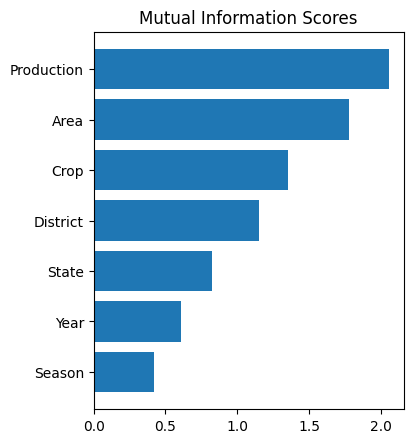

In [35]:
plt.figure(dpi=100, figsize=(4, 5))
plot_mi_score(mi_scores)